In [14]:
import tensorflow as tf

#tf.keras.utils.set_random_seed(42)
#tf.config.experimental.enable_op_determinism()

In [15]:
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays wit

In [16]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [18]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
gru (GRU)                    (None, 8)                 624       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [7]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 27ms/step - loss: 0.6926 - accuracy: 0.5401 - val_loss: 0.6918 - val_accuracy: 0.5872
Epoch 2/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6901 - accuracy: 0.6211 - val_loss: 0.6879 - val_accuracy: 0.6440
Epoch 3/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6791 - accuracy: 0.6594 - val_loss: 0.6629 - val_accuracy: 0.6740
Epoch 4/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6421 - accuracy: 0.6999 - val_loss: 0.6254 - val_accuracy: 0.7136
Epoch 5/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6108 - accuracy: 0.7273 - val_loss: 0.6019 - val_accuracy: 0.7252
Epoch 6/100
313/313 [==============================] - 8s 25ms/step - loss: 0.5891 - accuracy: 0.7437 - val_loss: 0.5814 - val_accuracy: 0.7478
Epoch 7/100
313/313 [==============================] - 8s 25ms/step - loss: 0.5685 - accuracy: 0.7566 - val_loss: 0.5634 - val_accuracy:

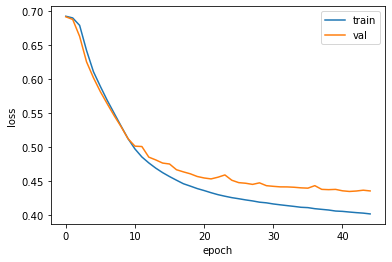

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 순환 층에 드롭아웃 적용하기

In [11]:
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 8)            800       
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [13]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 17s 54ms/step - loss: 0.6926 - accuracy: 0.5464 - val_loss: 0.6914 - val_accuracy: 0.6028
Epoch 2/100
313/313 [==============================] - 16s 52ms/step - loss: 0.6881 - accuracy: 0.6101 - val_loss: 0.6811 - val_accuracy: 0.6450
Epoch 3/100
313/313 [==============================] - 16s 51ms/step - loss: 0.6551 - accuracy: 0.6588 - val_loss: 0.6100 - val_accuracy: 0.6992
Epoch 4/100
313/313 [==============================] - 16s 51ms/step - loss: 0.5763 - accuracy: 0.7161 - val_loss: 0.5532 - val_accuracy: 0.7268
Epoch 5/100
313/313 [==============================] - 16s 51ms/step - loss: 0.5401 - accuracy: 0.7390 - val_loss: 0.5217 - val_accuracy: 0.7526
Epoch 6/100
313/313 [==============================] - 16s 52ms/step - loss: 0.5152 - accuracy: 0.7555 - val_loss: 0.5014 - val_accuracy: 0.7636
Epoch 7/100
313/313 [==============================] - 16s 52ms/step - loss: 0.4993 - accuracy: 0.7643 - val_loss: 0.4924 - val_ac

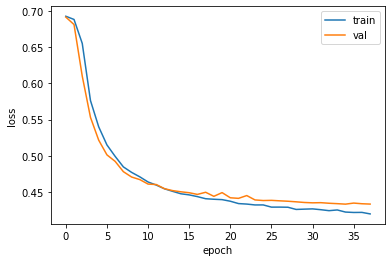

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()